In [8]:
from dotenv import load_dotenv
import os
load_dotenv()  # take environment variables from .env.

True

In [28]:
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

service = QiskitRuntimeService(channel="ibm_quantum", token=os.getenv('QISKIT_IBM_TOKEN'))

# 1. A quantum circuit for preparing the quantum state (|00> + |11>)/rt{2}
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()

# 2: Optimize problem for quantum execution.
backend = service.least_busy(operational=True, simulator=False)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(bell)

# 3. Execute using the Sampler primitive
sampler = Sampler(mode=backend)
sampler.options.default_shots = 1024  # Options can be set using auto-complete.
job = sampler.run([isa_circuit])
print(f"Job ID is {job.job_id()}")
pub_result = job.result()[0]
print(f"Counts for the meas output register: {pub_result.data.meas.get_counts()}")

Job ID is cyf4pfs7v8tg008he2tg
Counts for the meas output register: {'01': 71, '11': 484, '00': 437, '10': 32}


In [29]:
bell.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In [30]:
from qiskit.visualization import plot_histogram

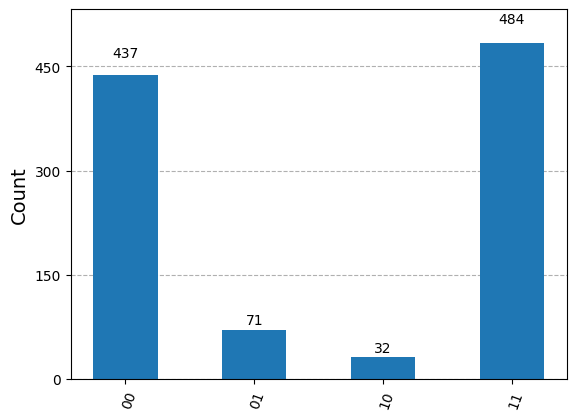

In [34]:
plot_histogram(pub_result.data.meas.get_counts())

> the above is thanks to <https://github.com/Qiskit/qiskit-ibm-runtime>

In [40]:
# 1. A quantum circuit for preparing the quantum state (|00> + |11>)/rt{2}
bell = QuantumCircuit(1,1)
bell.h(0)
bell.measure(0,0)

# 2: Optimize problem for quantum execution.
backend = service.least_busy(operational=True, simulator=False)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(bell)

# 3. Execute using the Sampler primitive
sampler = Sampler(mode=backend)
sampler.options.default_shots = 1024  # Options can be set using auto-complete.
job = sampler.run([isa_circuit])
print(f"Job ID is {job.job_id()}")

Job ID is cyf4y7r01rbg008k9cq0


Counts for the meas output register: {'0': 506, '1': 518}


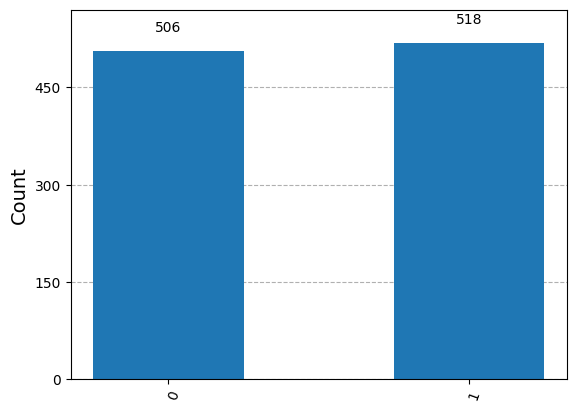

In [48]:
pub_result = job.result()[0]
print(f"Counts for the meas output register: {pub_result.data['c'].get_counts()}")

plot_histogram(pub_result.data['c'].get_counts())